# Handwriting Reader

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import pygame
from PIL import Image

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.activations import relu,linear, softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy


'''
from kivy.app import App
from kivy.uix.widget import Widget
from kivy.graphics import Line, Color
from kivy.core.window import Window
from kivy.graphics.texture import Texture

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.activations import relu,linear, softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
'''

pygame 2.5.2 (SDL 2.28.3, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


'\nfrom kivy.app import App\nfrom kivy.uix.widget import Widget\nfrom kivy.graphics import Line, Color\nfrom kivy.core.window import Window\nfrom kivy.graphics.texture import Texture\n\nfrom tensorflow.keras import layers\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, InputLayer\nfrom tensorflow.keras.activations import relu,linear, softmax\nfrom tensorflow.keras.optimizers import Adam\nfrom tensorflow.keras.losses import SparseCategoricalCrossentropy\n'

In [2]:
#I figured out these locations once and then saved them
#Essentially this data is too much so I am finding the sections
#which correspond to each letter so I can grab certain chunks of the data to train
start_letter_locations = {0: 0, 1: 13869, 2: 22537, 3: 45946, 4: 56080, 5: 67520, 
                          6: 68683, 7: 74445, 8: 81663, 9: 82783, 10: 91276, 11: 96879, 
                          12: 108465, 13: 120801, 14: 139811, 15: 197636, 16: 216977, 
                          17: 222789, 18: 234355, 19: 282774, 20: 305269, 21: 334277, 
                          22: 338459, 23: 349243, 24: 355515, 25: 366374}

#df = pd.read_csv('Data\A_Z Handwritten Data.csv', skiprows=10000, nrows=10000)
path = 'Data\A_Z Handwritten Data.csv'

num_rows = 5000

df = pd.read_csv(path, nrows=num_rows)

for i in range(1, 26):
    df_temp = pd.read_csv(path, skiprows=lambda x: x not in [0] and x < start_letter_locations[i], nrows=num_rows+1)
    #print(df_temp)
    df = pd.concat([df, df_temp], ignore_index=True)
    #df = df.append(df_temp, ignore_index=True)
    #pd.concat(objs, axis=0, join=’outer’, ignore_index=False, keys=None)

y = df['0']
X = df.drop('0', axis=1)
X = X / 255

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [46]:
y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [3]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(26, activation='linear'))
model.add(keras.layers.Softmax())

model.compile(optimizer=Adam(learning_rate=0.0001), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         1,690 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 26)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,426 (431.35 KB)

 Trainable params: 110,426 (431.35 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
hist = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


c:\Users\SamV\Documents\School\Senior Year\FINAL HANDWRITING\.venv\lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2845/2845 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5205 - loss: 1.8696

c:\Users\SamV\Documents\School\Senior Year\FINAL HANDWRITING\.venv\lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2845/2845 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5205 - loss: 1.8693 - val_accuracy: 0.8264 - val_loss: 0.6557
Epoch 2/10
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8414 - loss: 0.5889 - val_accuracy: 0.8662 - val_loss: 0.5065
Epoch 3/10
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8747 - loss: 0.4712 - val_accuracy: 0.8864 - val_loss: 0.4307
Epoch 4/10
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8933 - loss: 0.3989 - val_accuracy: 0.8993 - val_loss: 0.3809
Epoch 5/10
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9091 - loss: 0.3418 - val_accuracy: 0.9090 - val_loss: 0.3442
Epoch 6/10
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9182 - loss: 0.3068 - val_accuracy: 0.9178 - val_loss: 0.3124
Epoch 7/10
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9256 - loss: 0.2746 - val_accuracy: 0.9246 - val_loss: 0.2864
Epoch 8/10
2845/2845 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9331 - loss: 0.2470 - val

In [5]:
_,test_acc = model.evaluate(X_test, y_test)
print(f'Accuracy: {test_acc}')

1219/1219 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9382 - loss: 0.2314
Accuracy: 0.937884509563446


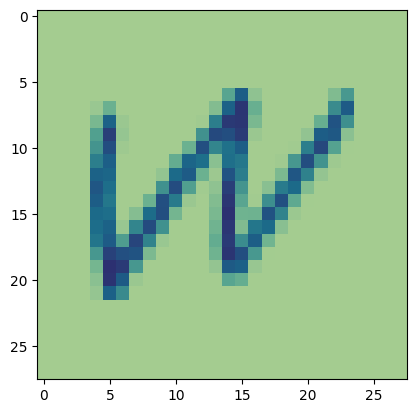

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Resposta:  W


In [57]:
letters =[chr(i) for i in range(65, 91)] 

f_rand_idx = 109300
plt.imshow(X.iloc[f_rand_idx].values.reshape(28, 28), cmap='crest')
plt.show()

pred_v = model.predict(np.array([X.iloc[f_rand_idx].values]))
print('Resposta: ', letters[np.argmax(pred_v)])

In [7]:
def downsample(df, block_size):
    '''
    lists = [[] for _ in range(28)]
    #df_lists = pd.DataFrame(np.nan, index=range(28), columns=range(28))

    for i in range(block_size):
        for j in range(block_size):
            all_vals = []
            for m in range(28):
                for n in range(28):
                    row = (i*28) + m
                    col = (j*28) + n
                    val = df.iloc[row, col]
                    all_vals.append(val)
            lists[i].append(all_vals)

    bool_list = pd.DataFrame(np.nan, index=range(28), columns=range(28))
    count_list = pd.DataFrame(np.nan, index=range(28), columns=range(28))

    for r in range(len(lists)):
        for c in range(len(lists[r])):
            count = sum(lists[r][c])
            if count > 0:
                bool_list.iloc[r, c] = True
            else:
                bool_list.iloc[r, c] = False
            count_list.iloc[r, c] = count

    return (bool_list, count_list)


    '''


    # Convert DataFrame to numpy array for faster processing
    arr = df.to_numpy()
    # Get the new dimensions
    new_height = arr.shape[0] // block_size
    new_width = arr.shape[1] // block_size
    # Prepare a new array of the same type
    new_arr = np.zeros((new_height, new_width), dtype=bool)

    # Iterate over new array indices
    for i in range(new_height):
        for j in range(new_width):
            # Determine the block in the original array
            vertical_slice = slice(i * block_size, (i + 1) * block_size)
            horizontal_slice = slice(j * block_size, (j + 1) * block_size)
            block = arr[vertical_slice, horizontal_slice]
            # Set the value in the new array based on the presence of any True in the block
            new_arr[i, j] = np.any(block)

    return pd.DataFrame(new_arr)

In [8]:
def df_to_image(df):
    array = df.to_numpy()
    image_data = np.where(array, 0, 255).astype(np.uint8)
    img = Image.fromarray(image_data, 'L')  # 'L' mode for grayscale
    return img

C:\Users\SamV\AppData\Local\Temp\ipykernel_23812\4270673015.py:65: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  single_row_color = single_row_bool.applymap(lambda x: 255 if x else 0)


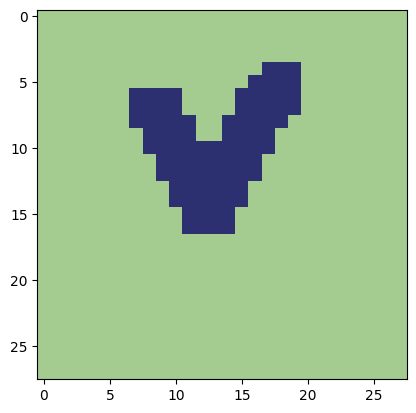

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Model Prediction:  T


In [37]:
pygame.init()

# Constants
width, height = 28**2, 28**2  # Size of the window in pixels
background_color = (0, 0, 0)  # Black
draw_color = (255, 255, 255)  # White
line_thickness = 2

# Setup the display
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Draw Here!")
screen.fill(background_color)
clock = pygame.time.Clock()

drawing = False
running = True

# Event loop
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            drawing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            drawing = False
        elif event.type == pygame.MOUSEMOTION and drawing:
            pygame.draw.circle(screen, draw_color, event.pos, line_thickness)

    pygame.display.flip()
    clock.tick(60)

# Convert the drawing on the screen to a numpy array
buffer_string = pygame.image.tostring(screen, 'RGB')
image = pygame.image.fromstring(buffer_string, (width, height), 'RGB')
array = pygame.surfarray.array3d(image)

# Check which pixels are colored (deviate from background_color)
is_colored = np.any(array != np.array(background_color).reshape(1, 1, 3), axis=2)

# Create DataFrame from the boolean array
df = pd.DataFrame(is_colored)
#df_condensed, df_count = downsample(df, 28)
df_condensed = downsample(df, 28)

df_condensed = df_condensed.T
df_final = df_condensed.copy()

for r in range(len(df_condensed)):
    for c, col_name in enumerate(df_condensed.columns):
        surrounding_list = []
        for r_add in range(-1, 2):
            for c_add in range(-1, 2):
                if r+r_add != -1:
                    try:
                        surrounding_list.append(df_condensed.iat[r+r_add, c+c_add])
                    except IndexError:
                        pass
        if True in surrounding_list:
            df_final.at[r, c] = True

pygame.quit()

single_row_bool = pd.DataFrame(df_final.values.flatten()).T
single_row_color = single_row_bool.applymap(lambda x: 255 if x else 0)
single_row_color = single_row_color / 255

plt.imshow(single_row_color.iloc[0].values.reshape(28, 28), cmap='crest')
plt.show()

pred_v = model.predict(np.array([single_row_color.iloc[0].values]))
print('Model Prediction: ', letters[np.argmax(pred_v)])

C:\Users\SamV\AppData\Local\Temp\ipykernel_13060\2019252454.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  single_row_color = single_row_bool.applymap(lambda x: 255 if x else 0)


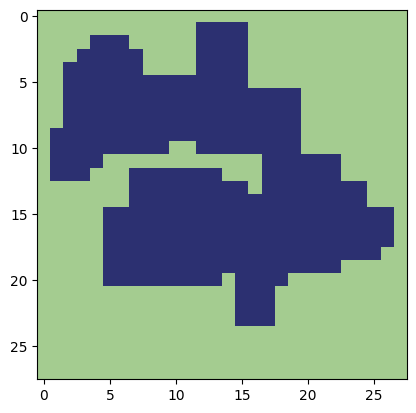

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Model Prediction:  B


In [48]:
single_row_bool = pd.DataFrame(df_final.values.flatten()).T
single_row_color = single_row_bool.applymap(lambda x: 255 if x else 0)
single_row_color = single_row_color / 255

plt.imshow(single_row_color.iloc[0].values.reshape(28, 28), cmap='crest')
plt.show()

pred_v = model.predict(np.array([single_row_color.iloc[0].values]))
print('Model Prediction: ', letters[np.argmax(pred_v)])